# Image Histograms 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

In [3]:
path = './starter_file/'

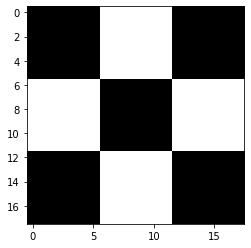

In [5]:
img = cv2.imread(path + 'checkerboard_18x18.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [7]:
img_flatten = img.ravel()
img_flatten.shape

(324,)

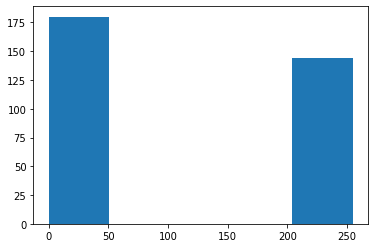

In [33]:
plt.hist(img_flatten,5, [0,255])
plt.show()

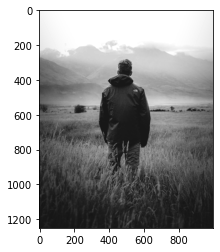

In [34]:
img = cv2.imread('human.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [35]:
img_ravel = img.ravel()

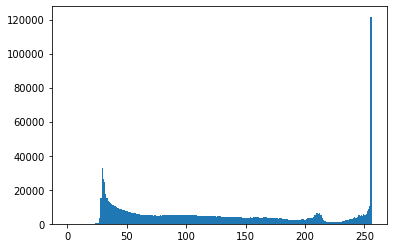

In [36]:
plt.hist(img_ravel, 256, [0, 256])
plt.show()

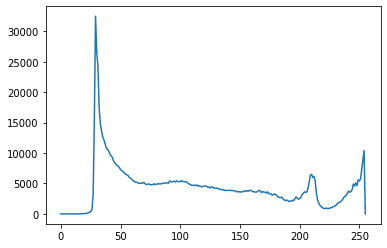

In [37]:
hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
plt.plot(hist)
plt.show()

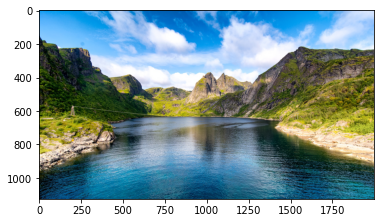

In [41]:
img = cv2.imread('mountain.jpeg', cv2.IMREAD_UNCHANGED)
plt.imshow(img[:,:,::-1])
plt.show()

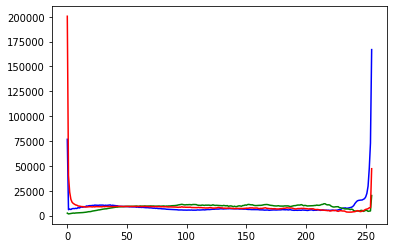

In [44]:
hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img], [1], None, [256], [0, 256])
hist3 = cv2.calcHist([img], [2], None, [256], [0, 256])

plt.plot(hist1, 'b'); plt.plot(hist2, 'g'); plt.plot(hist3, 'r')
plt.show()

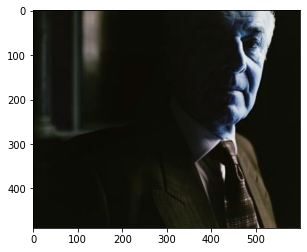

In [58]:
img = cv2.imread('man.jpeg')
img_eq = np.zeros_like(img)
plt.imshow(img)

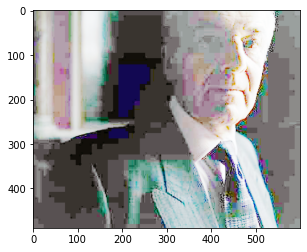

In [59]:
for i in range(3):
    img_eq[:,:,i] = cv2.equalizeHist(img[:,:,i])
plt.imshow(img_eq[:, :, ::-1])

In [60]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2])
img_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

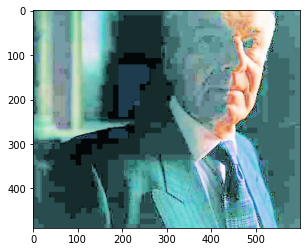

In [61]:
plt.imshow(img_eq[:,:,::-1])

# Color Segmentation

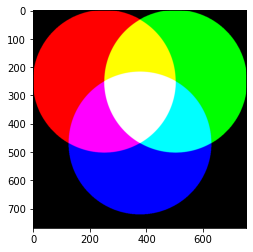

In [162]:
img = cv2.imread('rgb.png',cv2.IMREAD_COLOR)
plt.imshow(img[:,:,::-1])

In [163]:
img_csv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [169]:
# Set range for red color.
r_lb = np.array([145, 50, 50], np.uint8)
r_ub = np.array([180, 255, 255], np.uint8)

# Set range for green color.
g_lb = np.array([35, 50, 50], np.uint8)
g_ub = np.array([80, 255, 255], np.uint8)

# Set range for blue color.
b_lb = np.array([95, 50, 50], np.uint8)
b_ub = np.array([125, 255, 255], np.uint8)

In [174]:
# Set range for red color.
r_lb = np.array([0, 250, 250], np.uint8)
r_ub = np.array([10, 255, 255], np.uint8)

In [175]:
r_mask = cv2.inRange(img_csv, r_lb, r_ub)
g_mask = cv2.inRange(img_csv, g_lb, g_ub)
b_mask = cv2.inRange(img_csv, b_lb, b_ub)

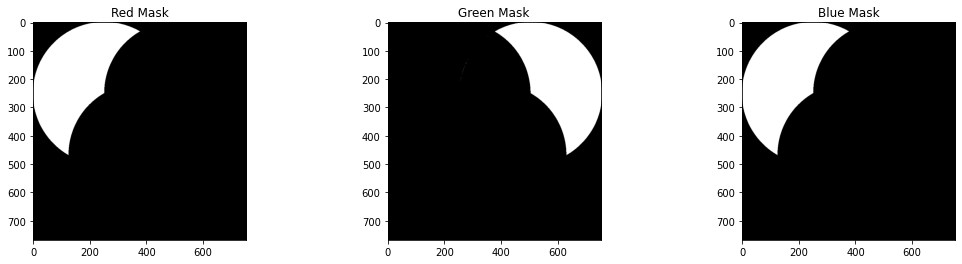

In [176]:
# Display each color mask.
plt.figure(figsize = (18, 4))
plt.subplot(131); plt.imshow(r_mask); plt.title('Red Mask')
plt.subplot(132); plt.imshow(g_mask); plt.title('Green Mask')
plt.subplot(133); plt.imshow(b_mask); plt.title('Blue Mask');

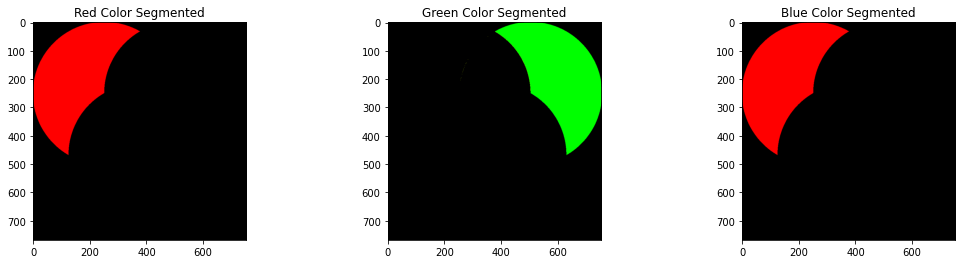

In [177]:
r_seg = cv2.bitwise_and(img, img, mask=r_mask)
g_seg = cv2.bitwise_and(img, img, mask=g_mask)
b_seg = cv2.bitwise_and(img, img, mask=b_mask)

# Display the segmented colors.
plt.figure(figsize = (18, 4))
plt.subplot(131); plt.imshow(r_seg[:, :, ::-1]); plt.title('Red Color Segmented')
plt.subplot(132); plt.imshow(g_seg[:, :, ::-1]); plt.title('Green Color Segmented')
plt.subplot(133); plt.imshow(b_seg[:, :, ::-1]); plt.title('Blue Color Segmented');